In [3]:
# load index file for all input data (secondary outputs)
# please note.. secondary outputs are stored directly by task (data doesn't have to be archived)
# so if you submitted multiple tasks for the same subject, there could be more than 1 output for 
# that subject. you will need to decide which one to use (sort by finish_date?)
import json
with open("input/index.json") as f:
    index = json.load(f) 
    
print("number of objects", len(index["objects"]))
print("dumping the list of objects")
for object in index["objects"]:
    print(object["meta"]["subject"], object["datatype"]["name"])
    
#you can examine the structure of index.json by opening it on another tab. it's under input/ directory.

number of objects 31
dumping the list of objects
delete neuro/freesurfer
07 neuro/parc-stats
11 neuro/parc-stats
11 neuro/freesurfer
02 neuro/parc-stats
06 neuro/parc-stats
09 neuro/parc-stats
04 neuro/parc-stats
13 neuro/parc-stats
08 neuro/parc-stats
01 neuro/parc-stats
05 neuro/parc-stats
10 neuro/parc-stats
08 neuro/freesurfer
12 neuro/parc-stats
03 neuro/parc-stats
15 neuro/parc-stats
14 neuro/parc-stats
03 neuro/freesurfer
05 neuro/freesurfer
10 neuro/freesurfer
02 neuro/freesurfer
01 neuro/freesurfer
09 neuro/freesurfer
15 neuro/freesurfer
12 neuro/freesurfer
04 neuro/freesurfer
06 neuro/freesurfer
13 neuro/freesurfer
14 neuro/freesurfer
delete neuro/anat/t1w


In [4]:
# participant information is also stored in the index.json
# TODO - I think I will move participants information out of index.json
for (subject, info) in index["participants"]["subjects"].items():
    print(info)


{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '24', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '1'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '20', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Gamer', 'ageAtFirstScanYears': '19', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '11'}
{'group': 'Gamer', 'ageAtFirstScanYears': '29', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPer

In [19]:
# let's load parc-stats/rois.csv for all subjects.
# while at it, let's group them into gamer v.s non-gamer

import pandas

gamer_rois=[]
nongamer_rois=[]

for object in index["objects"]:
    if object["datatype"]["name"] == "neuro/parc-stats":
        subject=object["meta"]["subject"]
        csv = pandas.read_csv("input/"+object["path"]+"/cortex.csv", index_col="subjectID")
        phenotype = index["participants"]["subjects"][subject]
        if phenotype["group"] == "Gamer":
            gamer_rois.append(csv)
        elif phenotype["group"] == "Non-gamer":
            nongamer_rois.append(csv)
        else:
            print("I don't know what to do with this subject", subject, phenotype["group"])

#convert to a single panda frame for each group
gamer_rois = pandas.concat(gamer_rois)
nongamer_rois = pandas.concat(nongamer_rois)

#show a sample..
gamer_rois

,parcID,structureID,nodeID,number_of_vertices,surface_area_mm^2,gray_matter_volume_mm^3,average_thickness_mm,thickness_stddev_mm,integrated_rectified_mean_curvature_mm^-1,integrated_rectified_gaussian_curvature_mm^-2,folding_index,intrinsic_curvature_index
subjectID,,,,,,,,,,,,
6,1,lh_bankssts,1,1449,959,2420,2.591,0.460,0.092,0.018,8,1.1
6,2,lh_caudalanteriorcingulate,1,992,667,1921,2.559,0.783,0.127,0.025,13,1.0
6,3,lh_caudalmiddlefrontal,1,2664,1840,5368,2.690,0.516,0.113,0.023,21,2.6
6,4,lh_cuneus,1,2421,1709,3631,1.999,0.492,0.147,0.033,30,3.3
6,5,lh_entorhinal,1,505,352,1592,3.460,0.800,0.115,0.032,3,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
15,30,rh_supramarginal,1,7305,5119,13818,2.526,0.465,0.130,0.028,84,8.6
15,31,rh_frontalpole,1,389,325,1340,2.812,0.635,0.179,0.078,10,1.1
15,32,rh_temporalpole,1,705,580,3161,3.730,0.748,0.139,0.035,9,1.2


In [25]:
# now we can perform some statistics
groupby="structureID"

gamer_means = gamer_rois.groupby(groupby).mean()
nongamer_means = nongamer_rois.groupby(groupby).mean()

gamer_std = gamer_rois.groupby(groupby).std()
nongamer_std = nongamer_rois.groupby(groupby).std()


#dump..
print("gamer")
print(gamer_means["average_thickness_mm"])
print("non-gamer")
print(nongamer_means["average_thickness_mm"])

gamer
structureID
lh_bankssts                   2.4556
lh_caudalanteriorcingulate    2.5896
lh_caudalmiddlefrontal        2.5392
lh_cuneus                     1.8468
lh_entorhinal                 3.3650
                               ...  
rh_superiorparietal           2.2676
rh_superiortemporal           2.8628
rh_supramarginal              2.6310
rh_temporalpole               3.6482
rh_transversetemporal         2.4630
Name: average_thickness_mm, Length: 68, dtype: float64
non-gamer
structureID
lh_bankssts                   2.5538
lh_caudalanteriorcingulate    2.4932
lh_caudalmiddlefrontal        2.6436
lh_cuneus                     1.8385
lh_entorhinal                 3.3412
                               ...  
rh_superiorparietal           2.2074
rh_superiortemporal           2.8306
rh_supramarginal              2.6319
rh_temporalpole               3.7729
rh_transversetemporal         2.4432
Name: average_thickness_mm, Length: 68, dtype: float64


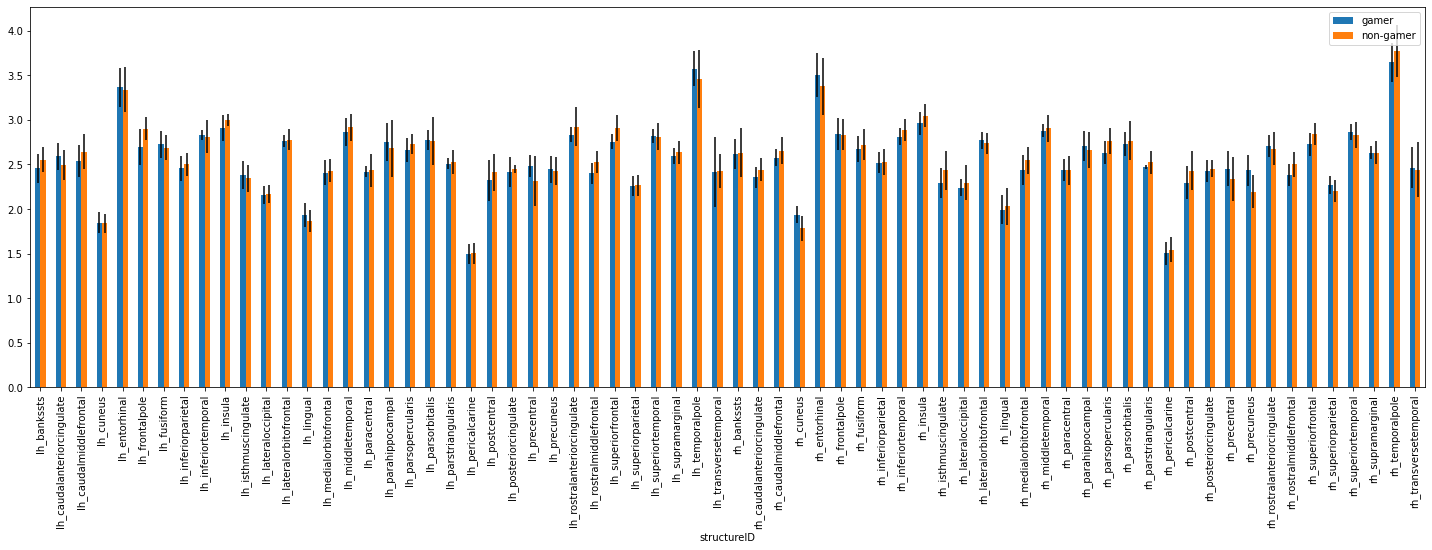

In [24]:
column="average_thickness_mm"

# visualize the results
df_means = pandas.DataFrame({
    "gamer": gamer_means[column], "non-gamer": nongamer_means[column], 
})
df_std = pandas.DataFrame({
    "gamer": gamer_std[column], "non-gamer": nongamer_std[column], 
})
df_means.plot.bar(figsize=(25,7), yerr=df_std)
